In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import sklearn
import seaborn as sns
%matplotlib inline

In [5]:
import os
os.getcwd() 

'D:\\GitHub\\BabyPython\\Titanic'

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
type(train)
train.shape
type(test)
test.shape

pandas.core.frame.DataFrame

(891, 12)

pandas.core.frame.DataFrame

(418, 11)

In [58]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD44BA8>,
      dtype=object)

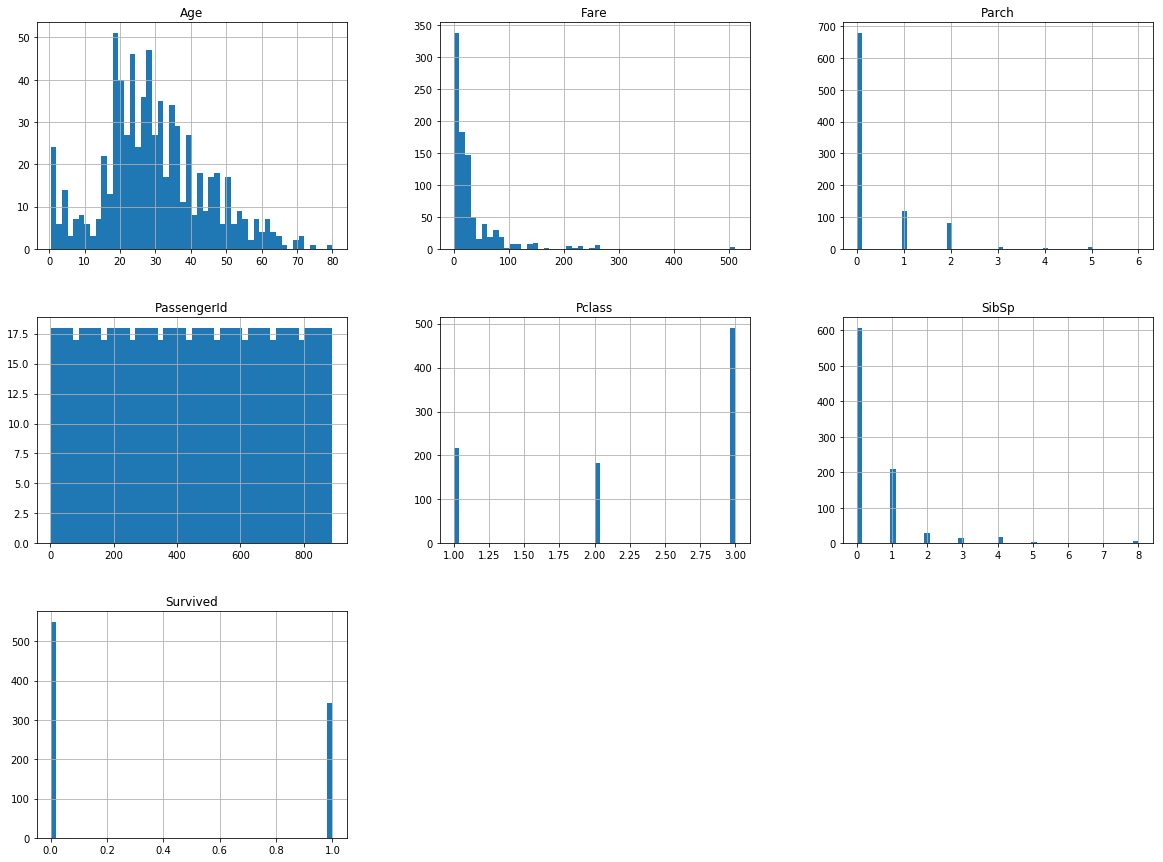

In [77]:
train.hist(bins=50, figsize=(20,15), density=False)

In [24]:
p = train.Survived.mean()
p
np.sqrt(p * (1-p))

0.3838383838383838

0.48631931786709987

In [36]:
# train.pivot_table(index='Sex', aggfunc='count')
train.pivot_table(index='Survived')

Age       Fare     Parch  PassengerId    Pclass     SibSp
Survived                                                                 
0         30.626179  22.117887  0.329690   447.016393  2.531876  0.553734
1         28.343690  48.395408  0.464912   444.368421  1.950292  0.473684

In [31]:
def freq1way(df, var):
    """
    Returns 1-way frequency table (counts and percentages) for column var of pandas dataframe df
    """
    f = df[var].value_counts().sort_index().to_frame(var)
    f['pct'] = 100 * f[var] / f[var].sum()
    return f

In [33]:
freq1way(train, 'Sex')
freq1way(train, 'Survived')
freq1way(train, 'Pclass')
freq1way(train, 'SibSp')
freq1way(train, 'Parch')
freq1way(train, 'SibSp')
freq1way(train, 'Embarked')

Sex        pct
female  314  35.241302
male    577  64.758698

Survived        pct
0       549  61.616162
1       342  38.383838

Pclass        pct
1     216  24.242424
2     184  20.650954
3     491  55.106622

SibSp        pct
0    608  68.237935
1    209  23.456790
2     28   3.142536
3     16   1.795735
4     18   2.020202
5      5   0.561167
8      7   0.785634

Parch        pct
0    678  76.094276
1    118  13.243547
2     80   8.978676
3      5   0.561167
4      4   0.448934
5      5   0.561167
6      1   0.112233

SibSp        pct
0    608  68.237935
1    209  23.456790
2     28   3.142536
3     16   1.795735
4     18   2.020202
5      5   0.561167
8      7   0.785634

Embarked        pct
C       168  18.897638
Q        77   8.661417
S       644  72.440945

In [40]:
train.pivot_table(index=('Sex', 'Pclass'), values='Survived', aggfunc=(np.mean, 'count'))
# train.groupby('Sex').mean('Survived')

count      mean
Sex    Pclass                 
female 1        94.0  0.968085
       2        76.0  0.921053
       3       144.0  0.500000
male   1       122.0  0.368852
       2       108.0  0.157407
       3       347.0  0.135447

In [72]:
[train.pivot_table(index=_, values='Survived', aggfunc=(np.mean, 'count')) for _ in ('Sex', 'Pclass')]

[        count      mean
 Sex                    
 female  314.0  0.742038
 male    577.0  0.188908,         count      mean
 Pclass                 
 1       216.0  0.629630
 2       184.0  0.472826
 3       491.0  0.242363]

In [50]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [56]:
missAge = train[-train.Age.notnull()]
missAge

PassengerId  Survived  Pclass  \
5              6         0       3   
17            18         1       2   
19            20         1       3   
26            27         0       3   
28            29         1       3   
29            30         0       3   
31            32         1       1   
32            33         1       3   
36            37         1       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
55            56         1       1   
64            65         0       1   
65            66         1       3   
76            77         0       3   
77            78         0       3   
82            83         1       3   
87            88         0       3   
95            96         0       3   
101          102         0       3   
107          108         1       3   
109          110         1       3   
121          122         0       3   
126          127         0       3   
128          129         1       3   
140          141         0       3   
154          155         0       3   
..           ...       ...     ...   
718          719         0       3   
727          728         1       3   
732          733         0       2   
738          739         0       3   
739          740         0       3   
740          741         1       1   
760          761         0       3   
766          767         0       1   
768          769         0       3   
773          774         0       3   
776          777         0       3   
778          779         0       3   
783          784         0       3   
790          791         0       3   
792          793         0       3   
793          794         0       1   
815          816         0       1   
825          826         0       3   
826          827         0       3   
828          829         1       3   
832          833         0       3   
837          838         0       3   
839          840         1       1   
846          847         0       3   
849          850         1       1   
859          860         0       3   
863          864         0       3   
868          869         0       3   
878          879         0       3   
888          889         0       3   

                                               Name     Sex  Age  SibSp  \
5                                  Moran, Mr. James    male  NaN      0   
17                     Williams, Mr. Charles Eugene    male  NaN      0   
19                          Masselmani, Mrs. Fatima  female  NaN      0   
26                          Emir, Mr. Farred Chehab    male  NaN      0   
28                    O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0   
29                              Todoroff, Mr. Lalio    male  NaN      0   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1   
32                         Glynn, Miss. Mary Agatha  female  NaN      0   
36                                 Mamee, Mr. Hanna    male  NaN      0   
42                              Kraeff, Mr. Theodor    male  NaN      0   
45                         Rogers, Mr. William John    male  NaN      0   
46                                Lennon, Mr. Denis    male  NaN      1   
47                        O'Driscoll, Miss. Bridget  female  NaN      0   
48                              Samaan, Mr. Youssef    male  NaN      2   
55                                Woolner, Mr. Hugh    male  NaN      0   
64                            Stewart, Mr. Albert A    male  NaN      0   
65                         Moubarek, Master. Gerios    male  NaN      1   
76                                Staneff, Mr. Ivan    male  NaN      0   
77                         Moutal, Mr. Rahamin Haim    male  NaN      0   
82                   McDermott, Miss. Brigdet Delia  female  NaN      0   
87                    Slocovski, Mr. Selman Francis    male  NaN      0  

In [59]:
# there should be 9 rows but only 7??
train[train['SibSp']==8]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

In [69]:
# train[train['Name'].startswith('Sage')]
train[train['Name'].str.startswith('Sage,')]

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2343  69.55   NaN        S  
846  NaN      8      2  CA. 2343  69.55   NaN        S  
863  NaN      8      2  CA. 2343  69.55   NaN        S

In [73]:
# there should be 6 rows but only 5??
train[train['SibSp']==5]

PassengerId  Survived  Pclass                                Name  \
59            60         0       3  Goodwin, Master. William Frederick   
71            72         0       3          Goodwin, Miss. Lillian Amy   
386          387         0       3     Goodwin, Master. Sidney Leonard   
480          481         0       3      Goodwin, Master. Harold Victor   
683          684         0       3         Goodwin, Mr. Charles Edward   

        Sex   Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
59     male  11.0      5      2  CA 2144  46.9   NaN        S  
71   female  16.0      5      2  CA 2144  46.9   NaN        S  
386    male   1.0      5      2  CA 2144  46.9   NaN        S  
480    male   9.0      5      2  CA 2144  46.9   NaN        S  
683    male  14.0      5      2  CA 2144  46.9   NaN        S

In [76]:
# SibSp values seem wrong - recalculate from Name?
train[train['SibSp']==4].sort_values('Name')

PassengerId  Survived  Pclass                                     Name  \
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
813          814         0       3       Andersson, Miss. Ebba Iris Alfrida   
119          120         0       3        Andersson, Miss. Ellis Anna Maria   
68            69         1       3          Andersson, Miss. Erna Alexandra   
541          542         0       3     Andersson, Miss. Ingeborg Constanzia   
542          543         0       3        Andersson, Miss. Sigrid Elisabeth   
182          183         0       3    Asplund, Master. Clarence Gustaf Hugo   
261          262         1       3        Asplund, Master. Edvin Rojj Felix   
233          234         1       3           Asplund, Miss. Lillian Gertrud   
164          165         0       3             Panula, Master. Eino Viljami   
50            51         0       3               Panula, Master. Juha Niilo   
824          825         0       3             Panula, Master. Urho Abraham   
266          267         0       3                Panula, Mr. Ernesti Arvid   
686          687         0       3                 Panula, Mr. Jaako Arnold   
171          172         0       3                     Rice, Master. Arthur   
278          279         0       3                       Rice, Master. Eric   
16            17         0       3                     Rice, Master. Eugene   
787          788         0       3                Rice, Master. George Hugh   

        Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
850    male   4.0      4      2   347082  31.2750   NaN        S  
813  female   6.0      4      2   347082  31.2750   NaN        S  
119  female   2.0      4      2   347082  31.2750   NaN        S  
68   female  17.0      4      2  3101281   7.9250   NaN        S  
541  female   9.0      4      2   347082  31.2750   NaN        S  
542  female  11.0      4      2   347082  31.2750   NaN        S  
182    male   9.0      4      2   347077  31.3875   NaN        S  
261    male   3.0      4      2   347077  31.3875   NaN        S  
233  female   5.0      4      2   347077  31.3875   NaN        S  
164    male   1.0      4      1  3101295  39.6875   NaN        S  
50     male   7.0      4      1  3101295  39.6875   NaN        S  
824    male   2.0      4      1  3101295  39.6875   NaN        S  
266    male  16.0      4      1  3101295  39.6875   NaN        S  
686    male  14.0      4      1  3101295  39.6875   NaN        S  
171    male   4.0      4      1   382652  29.1250   NaN        Q  
278    male   7.0      4      1   382652  29.1250   NaN        Q  
16     male   2.0      4      1   382652  29.1250   NaN        Q  
787    male   8.0      4      1   382652  29.1250   NaN        Q